In [1]:
import pandas as pd
%pylab inline
import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
path_to_file40Hz = "/media/sf_VBox_Shared/London/accelerometer_40Hz/__016563_2014-08-08 12-02-19.bin_day1.RData.csv"
day1_40Hz = pd.read_csv(path_to_file40Hz)
path_to_file5sec = "/media/sf_VBox_Shared/London/accelerometer_5second/__016563_2014-08-08 12-02-19.bin_day1.csv"
day1_5sec = pd.read_csv(path_to_file5sec)

In [3]:
day1_40Hz.head()

,Gx,Gy,Gz
0,0.459432,0.651919,-0.611590
1,0.471297,0.632170,-0.635435
2,0.467342,0.644020,-0.643383
3,0.463387,0.655869,-0.619538
4,0.455478,0.651919,-0.623512


In [4]:
day1_40Hz.describe()

,Gx,Gy,Gz
count,3.456000e+06,3.456000e+06,3.456000e+06
mean,-2.787586e-01,8.501921e-02,-1.914466e-01
std,5.353071e-01,4.880666e-01,6.429143e-01
min,-8.076708e+00,-8.084580e+00,-8.094005e+00
25%,-6.745605e-01,-1.917690e-01,-7.720124e-01
50%,-3.905720e-01,7.734796e-02,-3.128317e-01
75%,1.015340e-01,4.445791e-01,3.608886e-01
max,8.119701e+00,8.090655e+00,8.184759e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5c0ad7650>]], dtype=object)

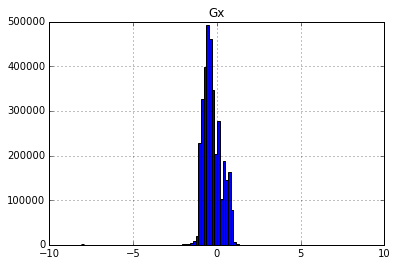

In [7]:
day1_40Hz.hist('Gx', bins=100)

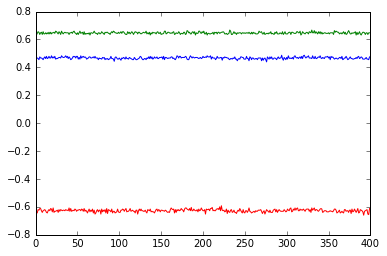

In [8]:
plt.plot(day1_40Hz[1:400])
plt.show()

In [32]:
a_x = day1_40Hz['Gx']
a_y = day1_40Hz['Gy']
a_z = day1_40Hz['Gz']

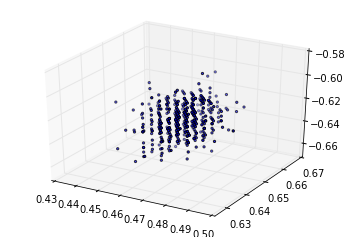

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a_x[:500], a_y[:500], a_z[:500], color='black', s=5);

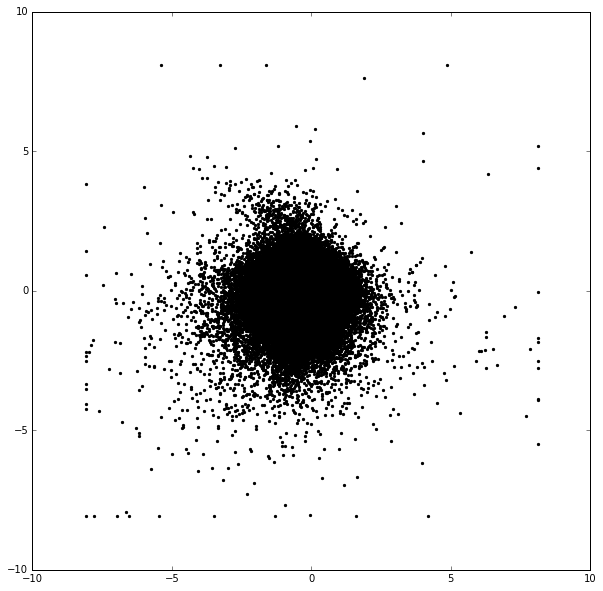

In [34]:
fig = subplots(figsize=(10, 10))
nmax = len(day1_40Hz)
plt.scatter(a_x[:nmax], a_y[:nmax], color='black', s=5);

In [42]:
radtodegree = 180/np.pi
theta = np.tanh(a_x/np.sqrt(a_y**2 + a_z**2))*radtodegree
psi = np.tanh(a_y/np.sqrt(a_x**2 + a_z**2))*radtodegree
phi = np.tanh(a_z/np.sqrt(a_x**2 + a_y**2))*radtodegree

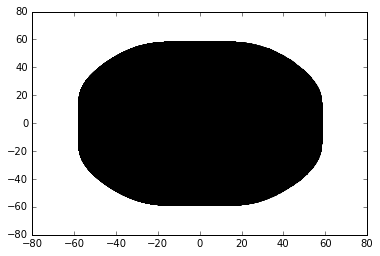

In [43]:
plt.scatter(theta[:nmax], psi[:nmax], color='black', s=5);

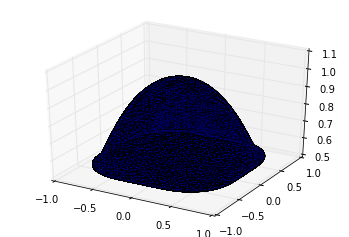

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.sin(theta[:nmax]/radtodegree), np.sin(psi[:nmax]/radtodegree), np.sin(phi[:nmax]/radtodegree), color='black', s=5);

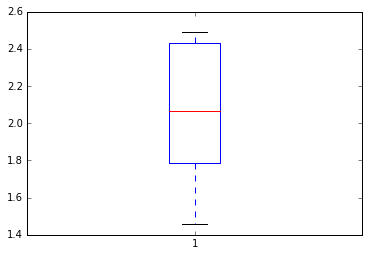

In [51]:
rad = np.tan(theta/radtodegree)**2 + np.tan(psi/radtodegree)**2 + np.tan(phi/radtodegree)**2
plt.boxplot(rad);

In [48]:
size = np.sqrt(a_x**2 + a_y**2 + a_z**2)
pos_x = a_x/size
pos_y = a_y/size
pos_z = a_z/size

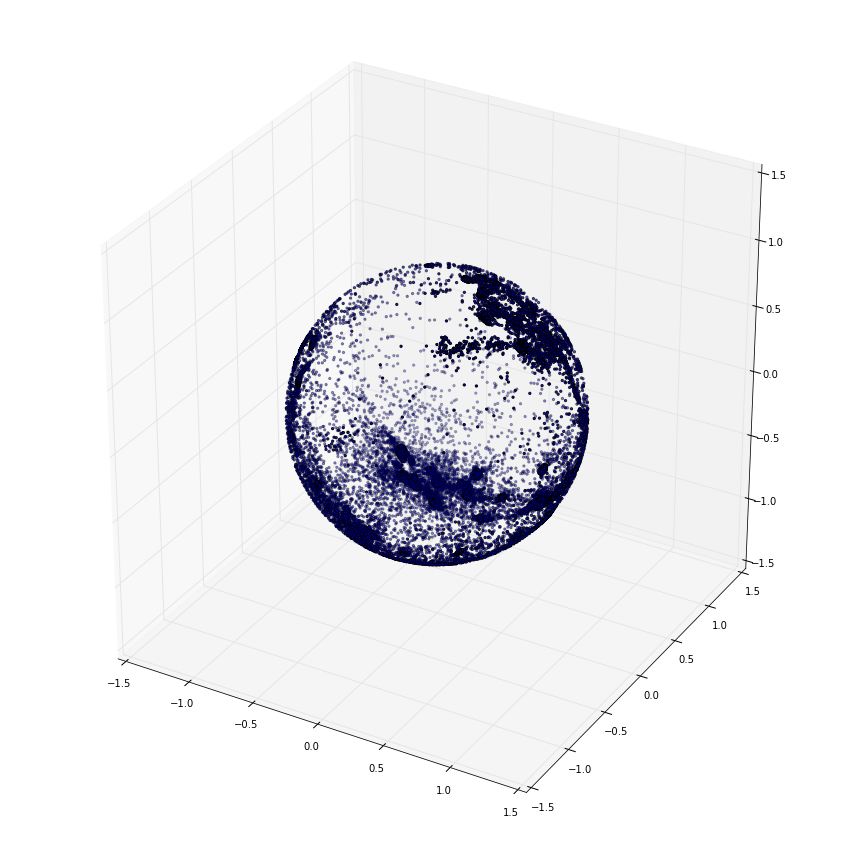

In [56]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
nmax = 500000
ax.scatter(pos_x[:nmax], pos_y[:nmax], pos_z[:nmax], color='black', s=5);

In [58]:
x = np.sin(theta/radtodegree)*np.cos(phi/radtodegree)
y = np.sin(theta/radtodegree)*np.sin(phi/radtodegree)
z = np.cos(phi/radtodegree)

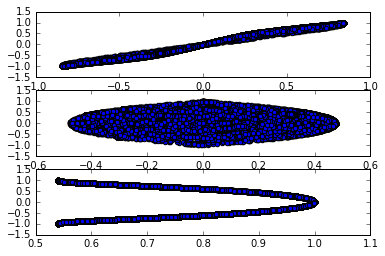

In [60]:
fig, axes = plt.subplots(3)

axes[0].scatter(x[:nmax], pos_x[:nmax])
axes[1].scatter(y[:nmax], pos_y[:nmax])
axes[2].scatter(z[:nmax], pos_z[:nmax])

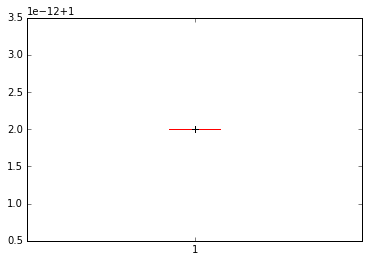

In [50]:
plt.boxplot(pos_x**2 + pos_y**2 + pos_z**2);